In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [2]:
df = pd.read_csv('./digit-recognizer/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
def pixelize(row):
    return np.reshape(df.iloc[row:row+1,1:].to_numpy(), (28,28))

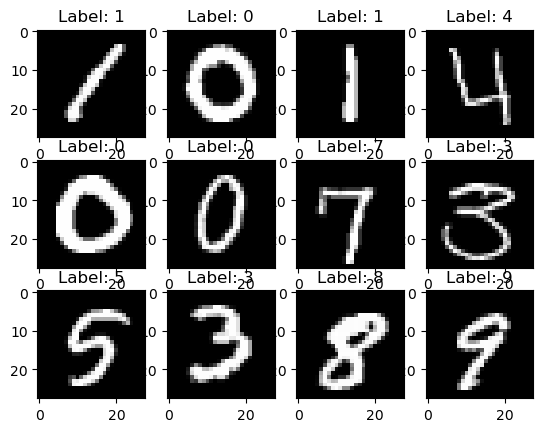

In [4]:
fig = plt.Figure(figsize=(12,16))

def show_image(row):
    pixels = pixelize(row)
    plt.subplot(3,4,row+1)
    img = plt.imshow(pixels, cmap='gray')
    ax = plt.gca()
    ax.set_title('Label: ' + str(df.iloc[row].label))
    return pixels, img

for i in range(12):
    show_image(i)
    
plt.show()



<AxesSubplot:>

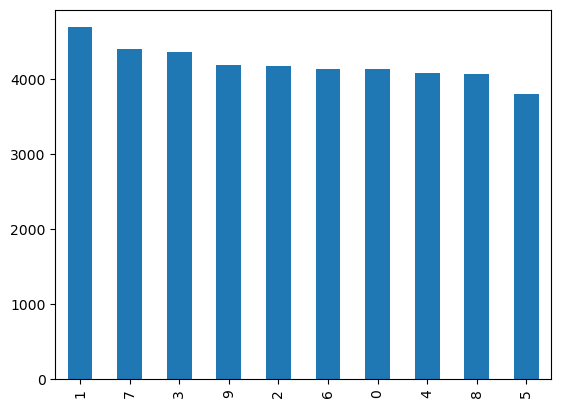

In [5]:
df.label.value_counts().plot.bar()

In [6]:
np.mean(df.drop(columns=['label']).loc[df.label == 1].to_numpy())

19.373043709371025

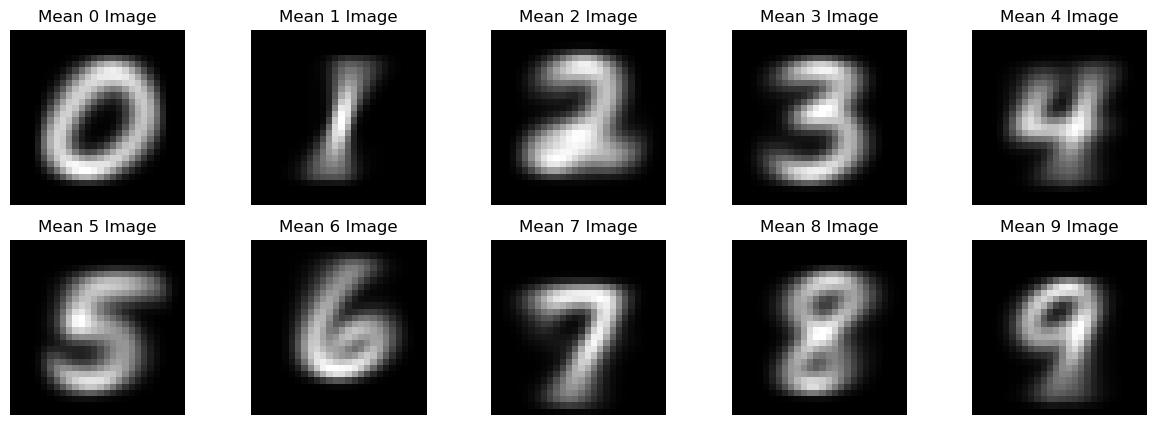

In [7]:
def mean_img(number, ax):
    mean = df.drop(columns=['label']).loc[df.label == number].mean().to_numpy()
    pixels =  np.reshape(mean, (28,28))
    ax.imshow(pixels, cmap='gray')
    ax.set_title(f'Mean {number} Image')
    ax.axis('off')
    return mean
    

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15,5))

for i in range(10):
    mean_img(i, ax[i//5][i%5])



In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['label']),df.label, test_size=.15, random_state=42)

<AxesSubplot:>

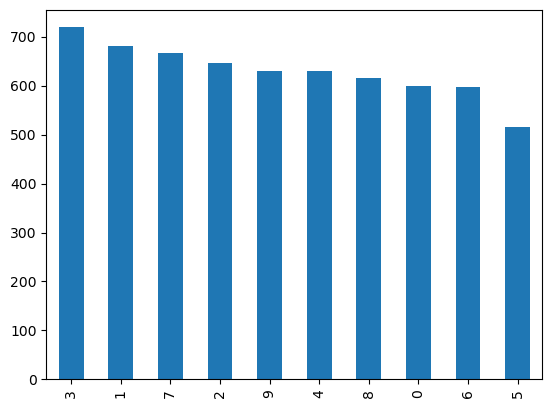

In [9]:
y_test.value_counts().plot.bar()

In [10]:
svc = SVC(class_weight='balanced')

params = {
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'C':[.5,1,5]
}

grid = GridSearchCV(
    estimator=svc,
    param_grid=params,
    cv=3,
    n_jobs=-1,
    verbose=1,
    scoring='f1_micro'
)


grid.fit(X_train,y_train)

grid.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


SVC(C=5, class_weight='balanced')

In [15]:
y_train_preds = grid.best_estimator_.predict(X_train)
y_test_preds = grid.best_estimator_.predict(X_test)

In [17]:
train_accuracy = accuracy_score(y_train,y_train_preds)
test_accuracy = accuracy_score(y_test,y_test_preds)

# train_accuracy = f1_score(y_train,y_train_preds)
# test_accuracy = f1_score(y_test,y_test_preds)

print("-------SVM Evaluation---------")
print('Test: ', test_accuracy)
print('Train: ', train_accuracy)

-------SVM Evaluation---------
Test:  0.9793650793650793
Train:  0.9992436974789916


In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion = confusion_matrix(y_test,y_test_preds)

Normalized confusion matrix
[[0.995      0.         0.00166667 0.         0.         0.
  0.00166667 0.         0.00166667 0.        ]
 [0.         0.98970588 0.00294118 0.         0.00147059 0.00147059
  0.00147059 0.00147059 0.00147059 0.        ]
 [0.00154799 0.00309598 0.98142415 0.00154799 0.00773994 0.
  0.         0.         0.00309598 0.00154799]
 [0.         0.         0.00278164 0.97635605 0.         0.00556328
  0.         0.00417246 0.00556328 0.00556328]
 [0.00158983 0.         0.00158983 0.         0.9745628  0.00158983
  0.0063593  0.00317965 0.         0.01112878]
 [0.00193798 0.         0.         0.01356589 0.00193798 0.97093023
  0.00775194 0.         0.00193798 0.00193798]
 [0.00334448 0.00167224 0.00167224 0.         0.         0.00501672
  0.98662207 0.         0.00167224 0.        ]
 [0.         0.0029985  0.00449775 0.0029985  0.0029985  0.00149925
  0.         0.97451274 0.00149925 0.0089955 ]
 [0.         0.00162338 0.00324675 0.00487013 0.00324675 0.00487013


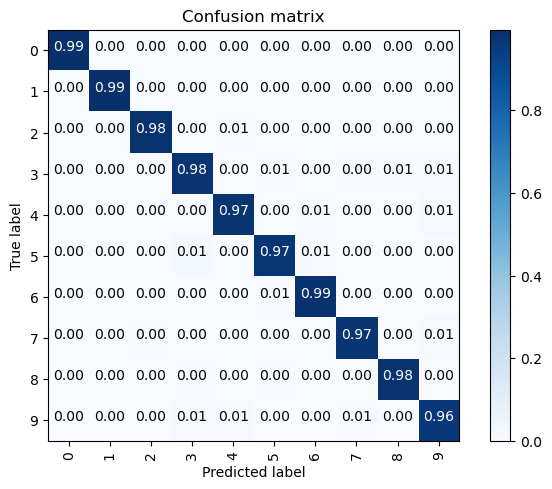

In [28]:
plot_confusion_matrix(confusion, [i for i in range(10)], normalize=True)

In [39]:
from keras import Sequential, layers

model = Sequential([
    # layers.Input(shape=(784,))
    layers.Conv2D(64,3,input_shape=(28,28,1), activation="relu"),
    layers.MaxPool2D(2),
    layers.Conv2D(64,3, activation="relu"),
    layers.MaxPool2D(2),
    layers.Flatten(),
    layers.Dropout(.1),
    layers.Dense(10, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [40]:
data = X_train.values.reshape(-1,28,28,1)
labels = tf.keras.utils.to_categorical(y_train)
m = model.fit(
    data, 
    labels,
    epochs=30, 
    validation_split=.2, 
    batch_size=128
)

Epoch 1/30
224/224 [==============================] - 11s 47ms/step - loss: 1.0362 - accuracy: 0.8721 - val_loss: 0.1293 - val_accuracy: 0.9640
Epoch 2/30
224/224 [==============================] - 10s 46ms/step - loss: 0.1249 - accuracy: 0.9634 - val_loss: 0.1025 - val_accuracy: 0.9707
Epoch 3/30
224/224 [==============================] - 10s 47ms/step - loss: 0.0790 - accuracy: 0.9751 - val_loss: 0.0778 - val_accuracy: 0.9797
Epoch 4/30
224/224 [==============================] - 10s 46ms/step - loss: 0.0587 - accuracy: 0.9818 - val_loss: 0.0717 - val_accuracy: 0.9805
Epoch 5/30
224/224 [==============================] - 11s 50ms/step - loss: 0.0506 - accuracy: 0.9836 - val_loss: 0.0664 - val_accuracy: 0.9824
Epoch 6/30
224/224 [==============================] - 11s 51ms/step - loss: 0.0365 - accuracy: 0.9876 - val_loss: 0.0745 - val_accuracy: 0.9818
Epoch 7/30
224/224 [==============================] - 11s 49ms/step - loss: 0.0349 - accuracy: 0.9881 - val_loss: 0.0774 - val_accuracy:

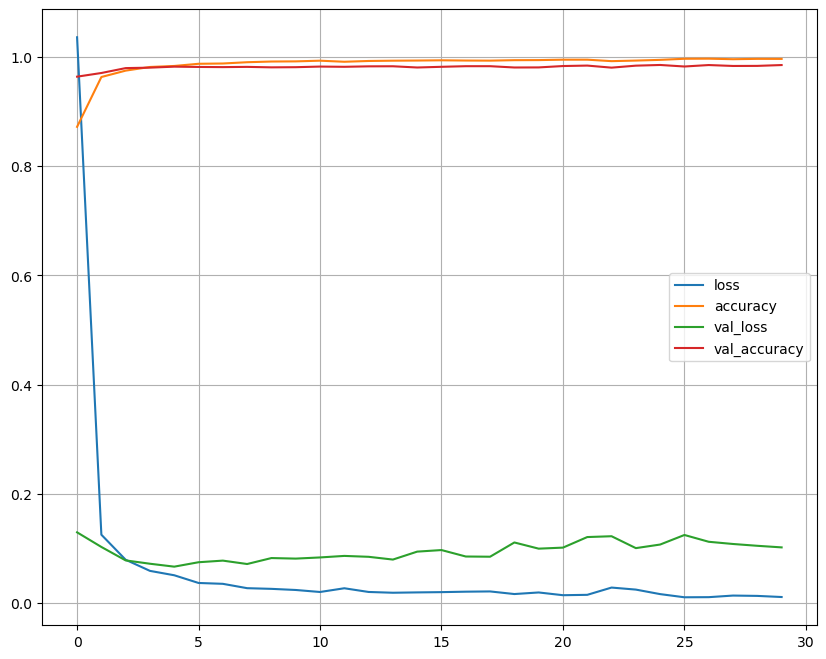

In [41]:
history = pd.DataFrame(m.history)
history.plot(figsize=(10,8))
plt.grid(True)

In [69]:
nn_y_test_preds = model.predict(X_test.values.reshape(-1,28,28,1))

197/197 [==============================] - 1s 5ms/step


In [70]:
results = pd.DataFrame([y_test.values,y_test_preds,nn_y_test_preds]).T
results.rename(columns={0:'truth',1:'svc',2:'cnn'},inplace=True)


In [73]:
nn_y_test_preds[0]

array([2.3854949e-17, 5.1819402e-23, 5.5926147e-15, 4.8481257e-19,
       6.1878983e-19, 4.9386948e-19, 3.2059453e-18, 1.6235057e-24,
       1.0000000e+00, 2.6763761e-13], dtype=float32)

Text(0.5, 1.0, 'Label: 0')

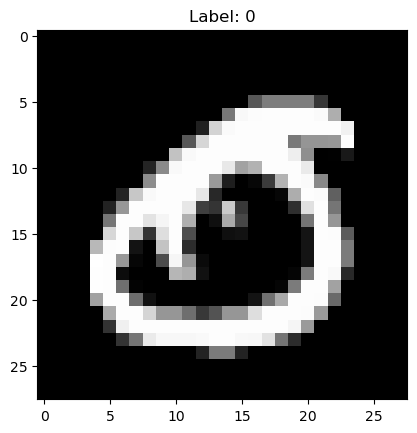

In [66]:
pixels = pixelize(6279)
# plt.subplot(3,4,row+1)
img = plt.imshow(pixels, cmap='gray')
ax = plt.gca()
ax.set_title('Label: ' + str(df.iloc[6279].label))